# Salary Prediction of Different Job Titles
## Group 60
## Weerasinghe R.M.P.A. - EG/2020/4273 
## Sovis W.F.S.V. - EG/2020/4222

### 1: Importing the necessary libraries

In [611]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

### 2: Loading up the dataset

In [612]:
file_path = "glassdoor_jobs.csv"
data = pd.read_csv(file_path)

In [613]:
data.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),NaN
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD),NaN


### 3: Selecting relevant columns in the table

In [614]:
# Remove specified columns
columns_to_remove = ['Job Description', 'Competitors',]
data_cleaned = data.drop(columns=columns_to_remove)

### 4: Data Cleaning and Preprocessing

#### 4.1 Handling Missing Values

In [615]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Rating             922 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       945 non-null    object 
 7   Size               945 non-null    object 
 8   Founded            859 non-null    float64
 9   Type of ownership  945 non-null    object 
 10  Industry           917 non-null    object 
 11  Sector             917 non-null    object 
 12  Revenue            945 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 97.2+ KB


In [616]:
# remobing null values of 'Salary Estimate' column
df_new = data_cleaned.dropna(subset=['Salary Estimate'])

In [617]:
df_new.shape

(742, 13)

#### 4.2 Replicating the original Data 

In [618]:
df_start = df_new.iloc[:,:15]
df_start.head()

,Unnamed: 0,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD)
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD)
3,3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD)
4,4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


#### 4.2 Creating column 'hourly'

In [619]:
df_start['hourly'] = df_start['Salary Estimate'].apply(lambda x: 1 if 'Per Hour' in x else 0)

In [620]:
df_start[df_start['hourly'] == 1].shape

(24, 14)

In [621]:
df_start = df_start[df_start['hourly'] == 0]

#### 4.3 Creating column 'employer_provided'

In [622]:
df_start['employer_provided'] = df_start['Salary Estimate'].apply(lambda x: 1 if 'Employer Provided' in x else 0)

In [623]:
df_start.shape

(718, 15)

In [624]:
df_start.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,employer_provided
0,0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0


#### 4.4 Creating columns 'min_salary' and 'max_salary'

In [625]:
df_start['min_salary'] = (df_start['Salary Estimate'].apply(lambda x: re.findall(r'\d+', x)[0]).astype(int))
df_start['max_salary'] = (df_start['Salary Estimate'].apply(lambda x: re.findall(r'\d+', x)[1]).astype(int))

#### 4.5 Creating column 'avg_salary'

In [626]:
df_start['avg_salary'] = (df_start['min_salary'] + df_start['max_salary'])/2

In [627]:
df_start['avg_salary'].describe()

count    718.000000
mean     103.153900
std       36.898694
min       15.500000
25%       76.500000
50%       98.500000
75%      124.000000
max      254.000000
Name: avg_salary, dtype: float64

#### 4.6 Further Cleaning

In [628]:
# Exclude non-numeric columns before computing correlations
numeric_columns = df_start.select_dtypes(include=np.number).columns
correlation_matrix = df_start[numeric_columns].corr()['avg_salary']

print(correlation_matrix)

Unnamed: 0          -0.025412
Rating               0.123619
Founded             -0.023205
hourly                    NaN
employer_provided    0.140916
min_salary           0.978927
max_salary           0.989781
avg_salary           1.000000
Name: avg_salary, dtype: float64


In [629]:
df_start.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,employer_provided,min_salary,max_salary,avg_salary
0,0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,53,91,72.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,63,112,87.5
2,2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,80,90,85.0


In [630]:
print(df_start.columns)

# Update the columns_to_drop list based on the actual columns in the DataFrame
columns_to_drop = ['Unnamed: 0', 'Founded', 'hourly']
columns_to_drop = [col for col in columns_to_drop if col in df_start.columns]

# Drop the specified columns
df_start = df_start.drop(columns=columns_to_drop)

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary'],
      dtype='object')


In [631]:
df_start.head(3)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,employer_provided,min_salary,max_salary,avg_salary
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,53,91,72.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,63,112,87.5
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,80,90,85.0


#### 4.7 Checking Value Counts

In [632]:
df_start['Job Title'].value_counts()

Job Title
Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Scientist 2, QC Viral Vector         1
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Machine Learning Engineer (NLP)      1
Name: count, Length: 254, dtype: int64

In [633]:
# Define keywords
keywords = ['Scientist', 'Engineer', 'Analyst']

# Function to categorize job titles
def categorize_job_title(title):
    for keyword in keywords:
        if keyword.lower() in title.lower():
            return keyword
    return 'Other'

# Create a new column 'Job Title Category' using the categorize_job_title function
df_start['Job Title Category'] = df_start['Job Title'].apply(categorize_job_title)

# Display the updated DataFrame
df_start['Job Title Category'].value_counts()

Job Title Category
Scientist    416
Engineer     149
Analyst       96
Other         57
Name: count, dtype: int64

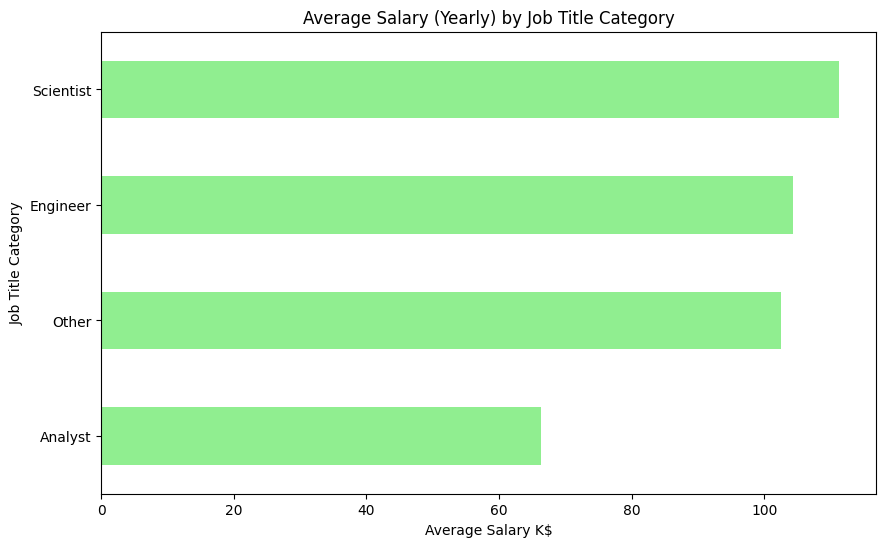

In [634]:
plt.figure(figsize=(10, 6))
df_start.groupby('Job Title Category')['avg_salary'].mean().sort_values().plot(kind='barh', color='lightgreen')
plt.xlabel('Average Salary K$')
plt.ylabel('Job Title Category')
plt.title('Average Salary (Yearly) by Job Title Category')
plt.show()

In [635]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Job Title Category' column
df_start['Job Title Category Encoded'] = label_encoder.fit_transform(df_start['Job Title Category'])

# Display the unique encoded values
print(df_start['Job Title Category Encoded'].unique())

[3 0 1 2]


In [636]:
len(df_start['Company Name'].value_counts())

334

In [637]:
df_start['Location'].value_counts()

Location
New York, NY         55
San Francisco, CA    49
Cambridge, MA        44
Chicago, IL          32
Boston, MA           23
                     ..
Columbia, SC          1
Red Bank, NJ          1
San Ramon, CA         1
Pella, IA             1
Olympia, WA           1
Name: count, Length: 194, dtype: int64

In [638]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Location' column
df_start['Location_Encoded'] = label_encoder.fit_transform(df_start['Location'])

# Display the updated DataFrame
df_start[['Location', 'Location_Encoded']]

,Location,Location_Encoded
0,"Albuquerque, NM",3
1,"Linthicum, MD",97
2,"Clearwater, FL",41
3,"Richland, WA",151
4,"New York, NY",119
...,...,...
950,"Cambridge, MA",29
951,"Nashville, TN",116
952,"Pittsburgh, PA",138
953,"Allentown, PA",7


In [639]:
len(df_start['Headquarters'].value_counts())

190

In [640]:
len(df_start['Size'].value_counts())

8

In [641]:
df_start['Size'].value_counts()

Size
1001 to 5000 employees     140
501 to 1000 employees      131
10000+ employees           127
201 to 500 employees       117
51 to 200 employees         93
5001 to 10000 employees     72
1 to 50 employees           28
Unknown                      9
Name: count, dtype: int64

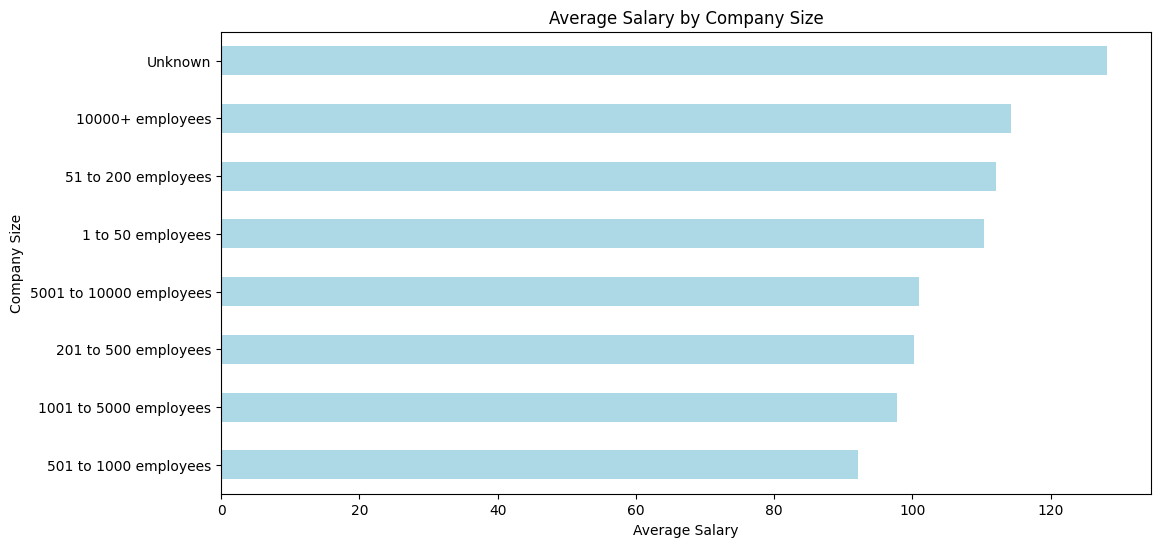

In [642]:
# Group by 'Size' and calculate the average salary
size_avg_salary = df_start.groupby('Size')['avg_salary'].mean().sort_values()

# Plotting with x and y axes exchanged
plt.figure(figsize=(12, 6))
size_avg_salary.plot(kind='barh', color='lightblue')  # Use 'barh' for horizontal bar plot
plt.title('Average Salary by Company Size')
plt.xlabel('Average Salary')
plt.ylabel('Company Size')
plt.show()

In [643]:
len(df_start['Type of ownership'].value_counts())

10

In [644]:
df_start['Type of ownership'].value_counts()

Type of ownership
Company - Private                 406
Company - Public                  191
Nonprofit Organization             45
Subsidiary or Business Segment     34
Government                         14
College / University               13
Hospital                            8
Other Organization                  3
School / School District            2
Unknown                             1
Name: count, dtype: int64

In [645]:
keywords = ['Private', 'Public', 'Government','Nonprofit']

# Function to categorize ownership types
def categorize_ownership(title):
    if pd.isna(title):
        return 'Other'
    
    for keyword in keywords:
        if keyword.lower() in str(title).lower():
            return keyword
    
    return 'Other'

# Create a new column 'Ownership Category' using the categorize_ownership function
df_start['Ownership Category'] = df_start['Type of ownership'].apply(categorize_ownership)

# Display the updated DataFrame
df_start['Ownership Category'].value_counts()

Ownership Category
Private       406
Public        191
Other          62
Nonprofit      45
Government     14
Name: count, dtype: int64

In [646]:
len(df_start['Industry'].value_counts())

58

In [647]:
df_start['Industry'].value_counts()

Industry
Biotech & Pharmaceuticals                   111
Insurance Carriers                           63
Computer Hardware & Software                 59
IT Services                                  50
Enterprise Software & Network Solutions      42
Health Care Services & Hospitals             32
Internet                                     29
Consulting                                   29
Aerospace & Defense                          25
Advertising & Marketing                      25
Consumer Products Manufacturing              20
Research & Development                       19
Colleges & Universities                      16
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             10
Staffing & Outsourcing                       10
Travel Agencies                               8
Lending                                       8
Food & Beverage Manufacturing                 8
Financial Analytics & Research 

In [648]:
len(df_start['Sector'].value_counts())

23

In [649]:
df_start['Sector'].value_counts()

Sector
Information Technology              180
Biotech & Pharmaceuticals           111
Business Services                    97
Insurance                            69
Finance                              40
Manufacturing                        34
Health Care                          32
Aerospace & Defense                  25
Education                            23
Retail                               15
Oil, Gas, Energy & Utilities         14
Government                           10
Non-Profit                            9
Travel & Tourism                      8
Transportation & Logistics            8
Real Estate                           8
Telecommunications                    6
Media                                 6
Arts, Entertainment & Recreation      4
Consumer Services                     4
Mining & Metals                       3
Agriculture & Forestry                1
Accounting & Legal                    1
Name: count, dtype: int64

In [650]:
len(df_start['Revenue'].value_counts())

13

In [651]:
df_start['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            197
$10+ billion (USD)                  122
$100 to $500 million (USD)           82
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            42
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               37
$10 to $25 million (USD)             31
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: count, dtype: int64

In [652]:
columns_to_remove = ['Company Name', 'Headquarters','Job Title', 'Salary Estimate', 'Location', 'Type of ownership','Job Title Category' ]
df_start = df_start.drop(columns=columns_to_remove)

In [653]:
df_start.head(3)

,Rating,Size,Industry,Sector,Revenue,employer_provided,min_salary,max_salary,avg_salary,Job Title Category Encoded,Location_Encoded,Ownership Category
0,3.8,501 to 1000 employees,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,53,91,72.0,3,3,Private
1,3.4,10000+ employees,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,63,112,87.5,3,97,Other
2,4.8,501 to 1000 employees,Security Services,Business Services,$100 to $500 million (USD),0,80,90,85.0,3,41,Private


In [654]:
# Extract 'Job Title Category Encoded' column
job_title_category_encoded = df_start['Job Title Category Encoded']

# Drop the 'Job Title Category Encoded' column from its current position
df_start = df_start.drop(columns=['Job Title Category Encoded'])

# Insert the 'Job Title Category Encoded' column at the beginning
df_start.insert(0, 'Job Title Category Encoded', job_title_category_encoded)

In [655]:
df_start.head(3)

,Job Title Category Encoded,Rating,Size,Industry,Sector,Revenue,employer_provided,min_salary,max_salary,avg_salary,Location_Encoded,Ownership Category
0,3,3.8,501 to 1000 employees,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,53,91,72.0,3,Private
1,3,3.4,10000+ employees,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,63,112,87.5,97,Other
2,3,4.8,501 to 1000 employees,Security Services,Business Services,$100 to $500 million (USD),0,80,90,85.0,41,Private


In [656]:
# Exclude non-numeric columns before computing correlations
numeric_columns = df_start.select_dtypes(include=np.number).columns
correlation_matrix = df_start[numeric_columns].corr()['avg_salary']

print(correlation_matrix)

Job Title Category Encoded    0.338553
Rating                        0.123619
employer_provided             0.140916
min_salary                    0.978927
max_salary                    0.989781
avg_salary                    1.000000
Location_Encoded             -0.003852
Name: avg_salary, dtype: float64


In [657]:
df_start = df_start.drop('Location_Encoded', axis=1)

#### 4.8 One hot encoding the rest

In [658]:
df_start = pd.get_dummies(df_start)

In [659]:
# Get all columns except 'Rating'
columns_to_convert = [col for col in df_start.columns if col != 'Rating']

# Convert True/False to 1/0 for all columns (except 'Rating')
df_start[columns_to_convert] = df_start[columns_to_convert].astype(int)

In [660]:
df_start.head(3)

,Job Title Category Encoded,Rating,employer_provided,min_salary,max_salary,avg_salary,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,...,Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Ownership Category_Government,Ownership Category_Nonprofit,Ownership Category_Other,Ownership Category_Private,Ownership Category_Public
0,3,3.8,0,53,91,72,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,3,3.4,0,63,112,87,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,4.8,0,80,90,85,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Data cleaning process completed

## 5 Making data ready

### 5.1 Split data for train and test

In [661]:
# Define features (X) and target variable (y)
features = df_start.drop(columns=['avg_salary'])
target = df_start['avg_salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

### 5.2 Implement Linear Regression Model

In [662]:
# Impute missing values with the mean (you can choose median or other strategies)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

linear_model = LinearRegression()

# Now, train the Linear Regression model with the imputed data
linear_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
linear_predictions = linear_model.predict(X_test_imputed)

# Calculate accuracy metrics
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

print(f"Linear Regression MSE: {linear_mse}")
print(f"Linear Regression R-squared: {linear_r2}")

Linear Regression MSE: 0.05863399726580324
Linear Regression R-squared: 0.9999565781169252


### 5.3 Implement Decision Tree Model

In [663]:
# Create a Decision Trees model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
tree_predictions = tree_model.predict(X_test)

# Calculate accuracy metrics
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)

print(f"Decision Trees MSE: {tree_mse}")
print(f"Decision Trees R-squared: {tree_r2}")

Decision Trees MSE: 329.873082194623
Decision Trees R-squared: 0.7557098087706602


### 5.4 Plotting some graphs

#### 5.4.1 Scatter plot to visualize predicted vs actual salaries

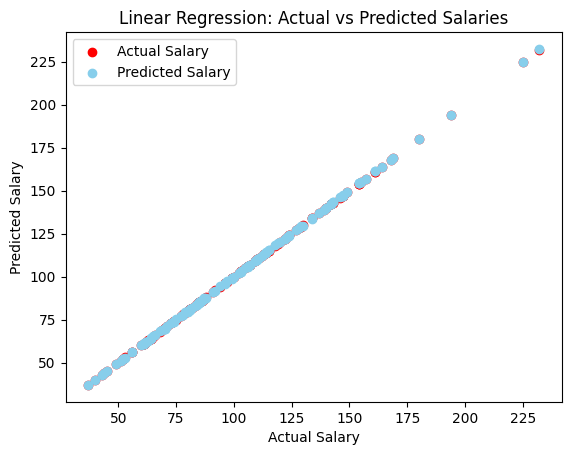

In [664]:
plt.scatter(y_test, y_test, color='red', label='Actual Salary')
plt.scatter(y_test, linear_predictions, color='skyblue', label='Predicted Salary')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Linear Regression: Actual vs Predicted Salaries")
plt.legend()
plt.show()

#### 5.4.2 Residual plot to check for homoscedasticity

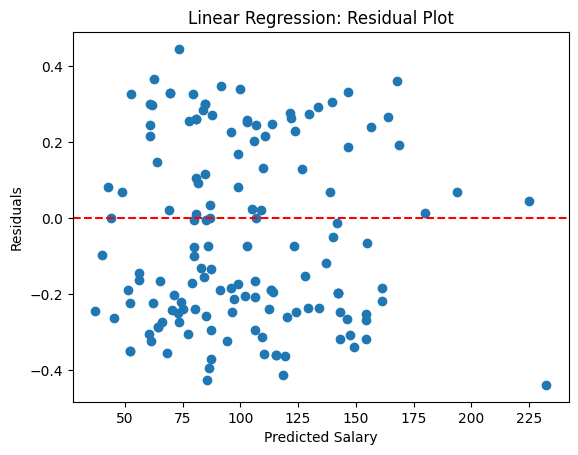

In [665]:
residuals = y_test - linear_predictions
plt.scatter(linear_predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residual Plot")
plt.show()

#### 5.4.3 Distribution of residuals

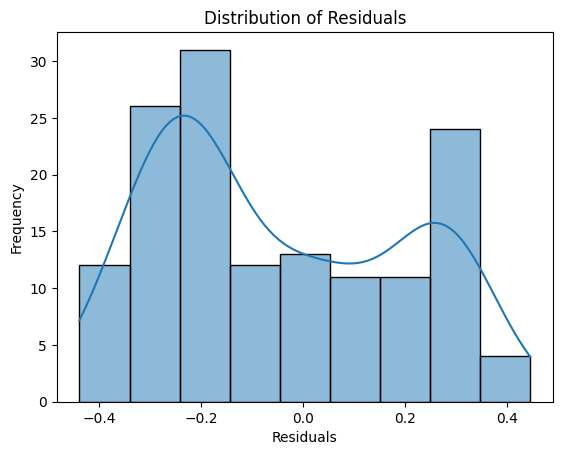

In [666]:
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

#### 5.4 Finding Accuracy of Each Model

In [667]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model) + ' --> ' + str(acc))

In [668]:
def model_acc(model, X_train, X_test, y_train, y_test):
    # Instantiate the imputer with a strategy (e.g., mean, median, or most_frequent)
    imputer = SimpleImputer(strategy='mean')

    # Fit and transform on training data
    X_train_imputed = imputer.fit_transform(X_train)

    # Transform test data using the imputer fitted on training data
    X_test_imputed = imputer.transform(X_test)

    # Fit the model
    model.fit(X_train_imputed, y_train)

    # Calculate accuracy
    acc = model.score(X_test_imputed, y_test)

    print(str(model) + ' --> ' + str(acc))

# Assuming X_train, X_test, y_train, y_test are your training and testing data
lr = LinearRegression()
model_acc(lr, X_train, X_test, y_train, y_test)

dt = DecisionTreeRegressor()
model_acc(dt, X_train, X_test, y_train, y_test)

LinearRegression() --> 0.9999565781169252
DecisionTreeRegressor() --> 0.9947029523005354


#### 5.6 Analyzing training and testing accuracy seperately

In [669]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Train models
    linear_model.fit(X_train, y_train)
    tree_model.fit(X_train, y_train)

    # Evaluate models
    linear_train_accuracy = linear_model.score(X_train, y_train)
    linear_test_accuracy = linear_model.score(X_test, y_test)

    tree_train_accuracy = tree_model.score(X_train, y_train)
    tree_test_accuracy = tree_model.score(X_test, y_test)

    return linear_train_accuracy, linear_test_accuracy, tree_train_accuracy, tree_test_accuracy

In [670]:
# Impute missing values with the mean (you can choose median or other strategies)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

linear_train_acc, linear_test_acc, tree_train_acc, tree_test_acc = train_and_evaluate_models(X_train_imputed, X_test_imputed, y_train, y_test)

print("Linear Regression Training Accuracy:", linear_train_acc)
print("Linear Regression Test Accuracy:", linear_test_acc)
print("\nDecision Trees Training Accuracy:", tree_train_acc)
print("Decision Trees Test Accuracy:", tree_test_acc)

Linear Regression Training Accuracy: 0.9999640267633679
Linear Regression Test Accuracy: 0.9999565781169252

Decision Trees Training Accuracy: 1.0
Decision Trees Test Accuracy: 0.9956286499567526


#### 5.7 Define hyperparameter grids for each model

In [671]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
linear_param_grid = {'fit_intercept': [True, False]}

tree_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)

# Perform Grid Search for Linear Regression
linear_grid_search = GridSearchCV(linear_model, linear_param_grid, cv=5, scoring='r2')
linear_grid_search.fit(X_train_imputed, y_train)

# Perform Grid Search for Decision Trees
tree_grid_search = GridSearchCV(tree_model, tree_param_grid, cv=5, scoring='r2')
tree_grid_search.fit(X_train, y_train)

# Get best parameters for each model
best_linear_params = linear_grid_search.best_params_
best_tree_params = tree_grid_search.best_params_

# Train models with the best parameters
best_linear_model = LinearRegression(**best_linear_params)
best_tree_model = DecisionTreeRegressor(random_state=42, **best_tree_params)

best_linear_model.fit(X_train_imputed, y_train)
best_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=4, random_state=42)

#### 5.8 Evaluate the models with hyparameters

In [672]:
linear_train_acc = best_linear_model.score(X_train_imputed, y_train)
linear_test_acc = best_linear_model.score(X_test_imputed, y_test)

tree_train_acc = best_tree_model.score(X_train, y_train)
tree_test_acc = best_tree_model.score(X_test, y_test)

print("Linear Regression Training Accuracy:", linear_train_acc)
print("Linear Regression Test Accuracy:", linear_test_acc)
print("\nDecision Trees Training Accuracy:", tree_train_acc)
print("Decision Trees Test Accuracy:", tree_test_acc)

Linear Regression Training Accuracy: 0.9999640267633679
Linear Regression Test Accuracy: 0.9999565781169252

Decision Trees Training Accuracy: 0.7597457872156937
Decision Trees Test Accuracy: 0.7565786145917557


In [673]:
# Compare test accuracies and choose the best model
if linear_test_acc > tree_test_acc:
    best_model = best_linear_model
    best_model_name = 'Linear Regression'
else:
    best_model = best_tree_model
    best_model_name = 'Decision Trees'

# Make predictions using the best model
best_model_predictions = best_model.predict(X_test_imputed)

# Calculate accuracy metrics for the best model
best_model_mse = mean_squared_error(y_test, best_model_predictions)
best_model_r2 = r2_score(y_test, best_model_predictions)

print(f"Best Model: {best_model_name}")
print(f"{best_model_name} MSE: {best_model_mse}")
print(f"{best_model_name} R-squared: {best_model_r2}")

Best Model: Linear Regression
Linear Regression MSE: 0.05863399726580324
Linear Regression R-squared: 0.9999565781169252


#### 5.9 Choose the best model

In [674]:
# Train models with the best parameters
best_linear_model = LinearRegression(**best_linear_params)
best_tree_model = DecisionTreeRegressor(random_state=42, **best_tree_params)

best_linear_model.fit(X_train_imputed, y_train)
best_tree_model.fit(X_train, y_train)

# Evaluate the models
linear_train_acc = best_linear_model.score(X_train_imputed, y_train)
linear_test_acc = best_linear_model.score(X_test_imputed, y_test)

tree_train_acc = best_tree_model.score(X_train, y_train)
tree_test_acc = best_tree_model.score(X_test, y_test)

print("Linear Regression Training Accuracy:", linear_train_acc)
print("Linear Regression Test Accuracy:", linear_test_acc)
print("\nDecision Trees Training Accuracy:", tree_train_acc)
print("Decision Trees Test Accuracy:", tree_test_acc)

# Compare test accuracies and choose the best model
if linear_test_acc > tree_test_acc:
    best_model = best_linear_model
    best_model_name = 'Linear Regression'
else:
    best_model = best_tree_model
    best_model_name = 'Decision Trees'

# Make predictions using the best model
best_model_predictions = best_model.predict(X_test_imputed)

# Calculate accuracy metrics for the best model
best_model_mse = mean_squared_error(y_test, best_model_predictions)
best_model_r2 = r2_score(y_test, best_model_predictions)

print(f"\nBest Model: {best_model_name}")
print(f"{best_model_name} Training Accuracy: {linear_train_acc if best_model_name == 'Linear Regression' else tree_train_acc}")
print(f"{best_model_name} Test Accuracy: {linear_test_acc if best_model_name == 'Linear Regression' else tree_test_acc}")
print(f"{best_model_name} MSE: {best_model_mse}")
print(f"{best_model_name} R-squared: {best_model_r2}")

Linear Regression Training Accuracy: 0.9999640267633679
Linear Regression Test Accuracy: 0.9999565781169252

Decision Trees Training Accuracy: 0.7597457872156937
Decision Trees Test Accuracy: 0.7565786145917557

Best Model: Linear Regression
Linear Regression Training Accuracy: 0.9999640267633679
Linear Regression Test Accuracy: 0.9999565781169252
Linear Regression MSE: 0.05863399726580324
Linear Regression R-squared: 0.9999565781169252


#### Found the best model, let's do further predictions

#### 6. Making a prediction

In [675]:
# Check for NaN values in X_test
nan_values = X_test.isnull().sum()
print(nan_values)

Job Title Category Encoded       0
Rating                           3
employer_provided                0
min_salary                       0
max_salary                       0
                                ..
Ownership Category_Government    0
Ownership Category_Nonprofit     0
Ownership Category_Other         0
Ownership Category_Private       0
Ownership Category_Public        0
Length: 112, dtype: int64


In [676]:
# Drop rows with NaN values
X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Adjust y_test accordingly if rows were dropped

In [677]:
best_model.score(X_test,y_test)

E:\ENGINEERING\FOE-UOR\SEM 5\ML\Salary Prediction\model\env\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.9999539865820596

In [678]:
df_start.head(3)

,Job Title Category Encoded,Rating,employer_provided,min_salary,max_salary,avg_salary,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,...,Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Ownership Category_Government,Ownership Category_Nonprofit,Ownership Category_Other,Ownership Category_Private,Ownership Category_Public
0,3,3.8,0,53,91,72,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,3,3.4,0,63,112,87,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,4.8,0,80,90,85,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [679]:
best_model.predict([[3, 3.8, 0, 80, 90, 85, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0]
])

array([97.80961555])